In [1]:
#%matplotlib widget
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import Counter
from astropy.io import fits

In [2]:
def Fits_Array(a):
    """Función para generar un array tridimensional de imágenes, siendo 'a'
    una lista con los pathnames de las imágenes que se quiere estackear"""
    b=np.empty([4096,4096,0])
    for i in range(len(a)):
        x=fits.open(a[i])
        b=np.dstack((b,np.array(x[0].data)))
    return b

In [3]:
#File names
fl10=glob.glob('Dark_10.000*')
fl50=glob.glob('Dark_50.000*')
fl100=glob.glob('Dark_100.000*')
fl200=glob.glob('Dark_200.000*')
fl300=glob.glob('Dark_300.000*')
fl400=glob.glob('DARK_*')

In [ ]:
#Cubos
data10=Fits_Array(fl10)
data50=Fits_Array(fl50)
data100=Fits_Array(fl100)
data200=Fits_Array(fl200)
data300=Fits_Array(fl300)
data400=Fits_Array(fl400)

In [ ]:
#Medianas
median10=np.nanmedian(data10,axis=2)
median50=np.nanmedian(data50,axis=2)
median100=np.nanmedian(data100,axis=2)
median200=np.nanmedian(data200,axis=2)
median300=np.nanmedian(data300,axis=2)
median400=np.nanmedian(data400,axis=2)

In [ ]:
#Desviación estándar
std10=np.std(median10)
std50=np.std(median50)
std100=np.std(median100)
std200=np.std(median200)
std300=np.std(median300)
std400=np.std(median400)

In [ ]:
#Promedios
m10=np.mean(median10)
m50=np.mean(median50)
m100=np.mean(median100)
m200=np.mean(median200)
m300=np.mean(median300)
m400=np.mean(median400)

In [24]:
desves10=np.nanstd(data10,axis=2)
desves50=np.nanstd(data50,axis=2)
desves100=np.nanstd(data100,axis=2)
desves200=np.nanstd(data200,axis=2)
desves300=np.nanstd(data300,axis=2)
desves400=np.nanstd(data400,axis=2)

In [ ]:
#Graficar todos los tiempos de exposicion y compararlos, sacar pixeles que no se comporten
#de manera lineal al comparar los tiempos de exposicion, y sacar los que se desvien demasiado
#en cada tiempo de exposicion y comparar.

In [25]:
cortes=np.linspace(0,5,501)

/tmp/ipykernel_3773/1636860517.py:2: RuntimeWarning: invalid value encountered in true_divide
  h=plt.hist((desves1/d2).ravel(),log=True,bins=test)


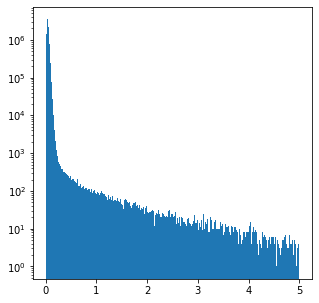

(array([3.060940e+05, 1.463201e+06, 2.992441e+06, 3.490541e+06,
        3.104415e+06, 2.215020e+06, 1.383638e+06, 7.877000e+05,
        4.351710e+05, 2.414750e+05, 1.352630e+05, 7.713200e+04,
        4.477700e+04, 2.708600e+04, 1.649800e+04, 1.019800e+04,
        6.640000e+03, 4.227000e+03, 2.945000e+03, 2.150000e+03,
        1.506000e+03, 1.234000e+03, 9.270000e+02, 8.240000e+02,
        7.020000e+02, 6.010000e+02, 5.710000e+02, 5.210000e+02,
        4.880000e+02, 4.500000e+02, 4.190000e+02, 3.810000e+02,
        3.860000e+02, 3.910000e+02, 3.520000e+02, 3.080000e+02,
        2.910000e+02, 3.260000e+02, 3.070000e+02, 3.030000e+02,
        2.810000e+02, 2.880000e+02, 2.720000e+02, 2.600000e+02,
        2.460000e+02, 2.480000e+02, 2.140000e+02, 2.390000e+02,
        2.500000e+02, 2.000000e+02, 2.000000e+02, 2.150000e+02,
        2.010000e+02, 1.780000e+02, 2.080000e+02, 2.030000e+02,
        1.800000e+02, 1.780000e+02, 1.750000e+02, 1.690000e+02,
        1.640000e+02, 1.720000e+02, 2.04

In [26]:
fig=plt.figure(figsize=(5,5))
h=plt.hist((desves1/d2).ravel(),log=True,bins=cortes)
#plt.axvline(m1,color='k',linestyle='dashed', linewidth=1)
#plt.savefig('Hist.png',facecolor='white')
plt.show()
h

In [16]:
Counter(d1.ravel()==65535).most_common()

[(False, 16777214), (True, 2)]

In [11]:
bounds=[0,150,250,500,7000]
cmp=colors.ListedColormap(['blue','white','blue','blue'])
norm=colors.BoundaryNorm(bounds,cmp.N)

/tmp/ipykernel_2749/778874481.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(desves1/d2,norm=colors.LogNorm())


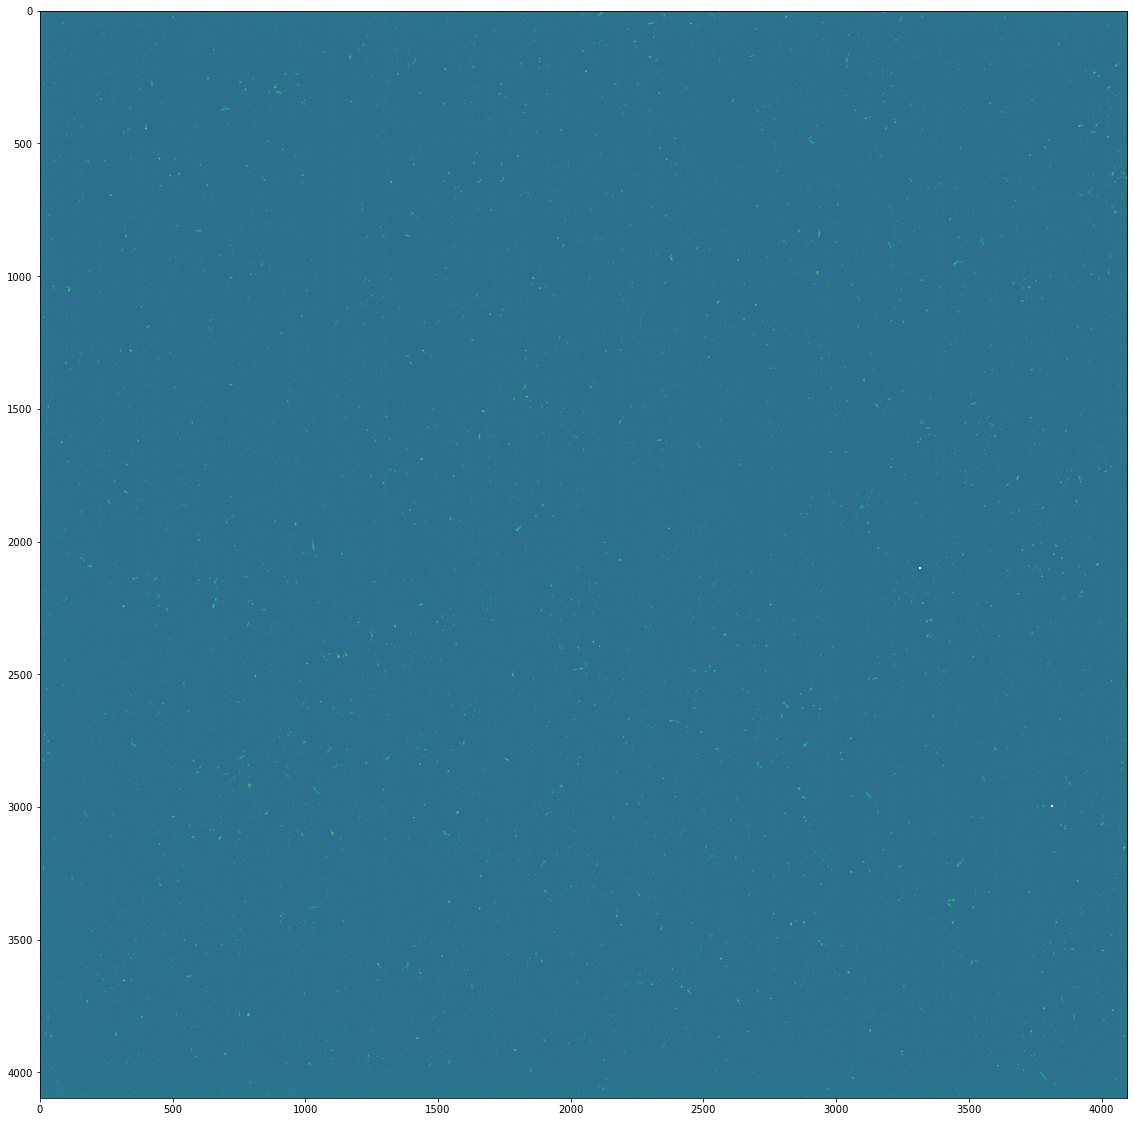

In [37]:
plt.figure(figsize=(20,20))
plt.imshow(desves1/d2,norm=colors.LogNorm())

In [8]:
d1[np.abs(d1-m1)<5*std1]=1
d1[np.abs(d1-m1)>5*std1]=0

In [9]:
d2[np.abs(d2-m2)<5*std2]=1
d2[np.abs(d2-m2)>5*std2]=0

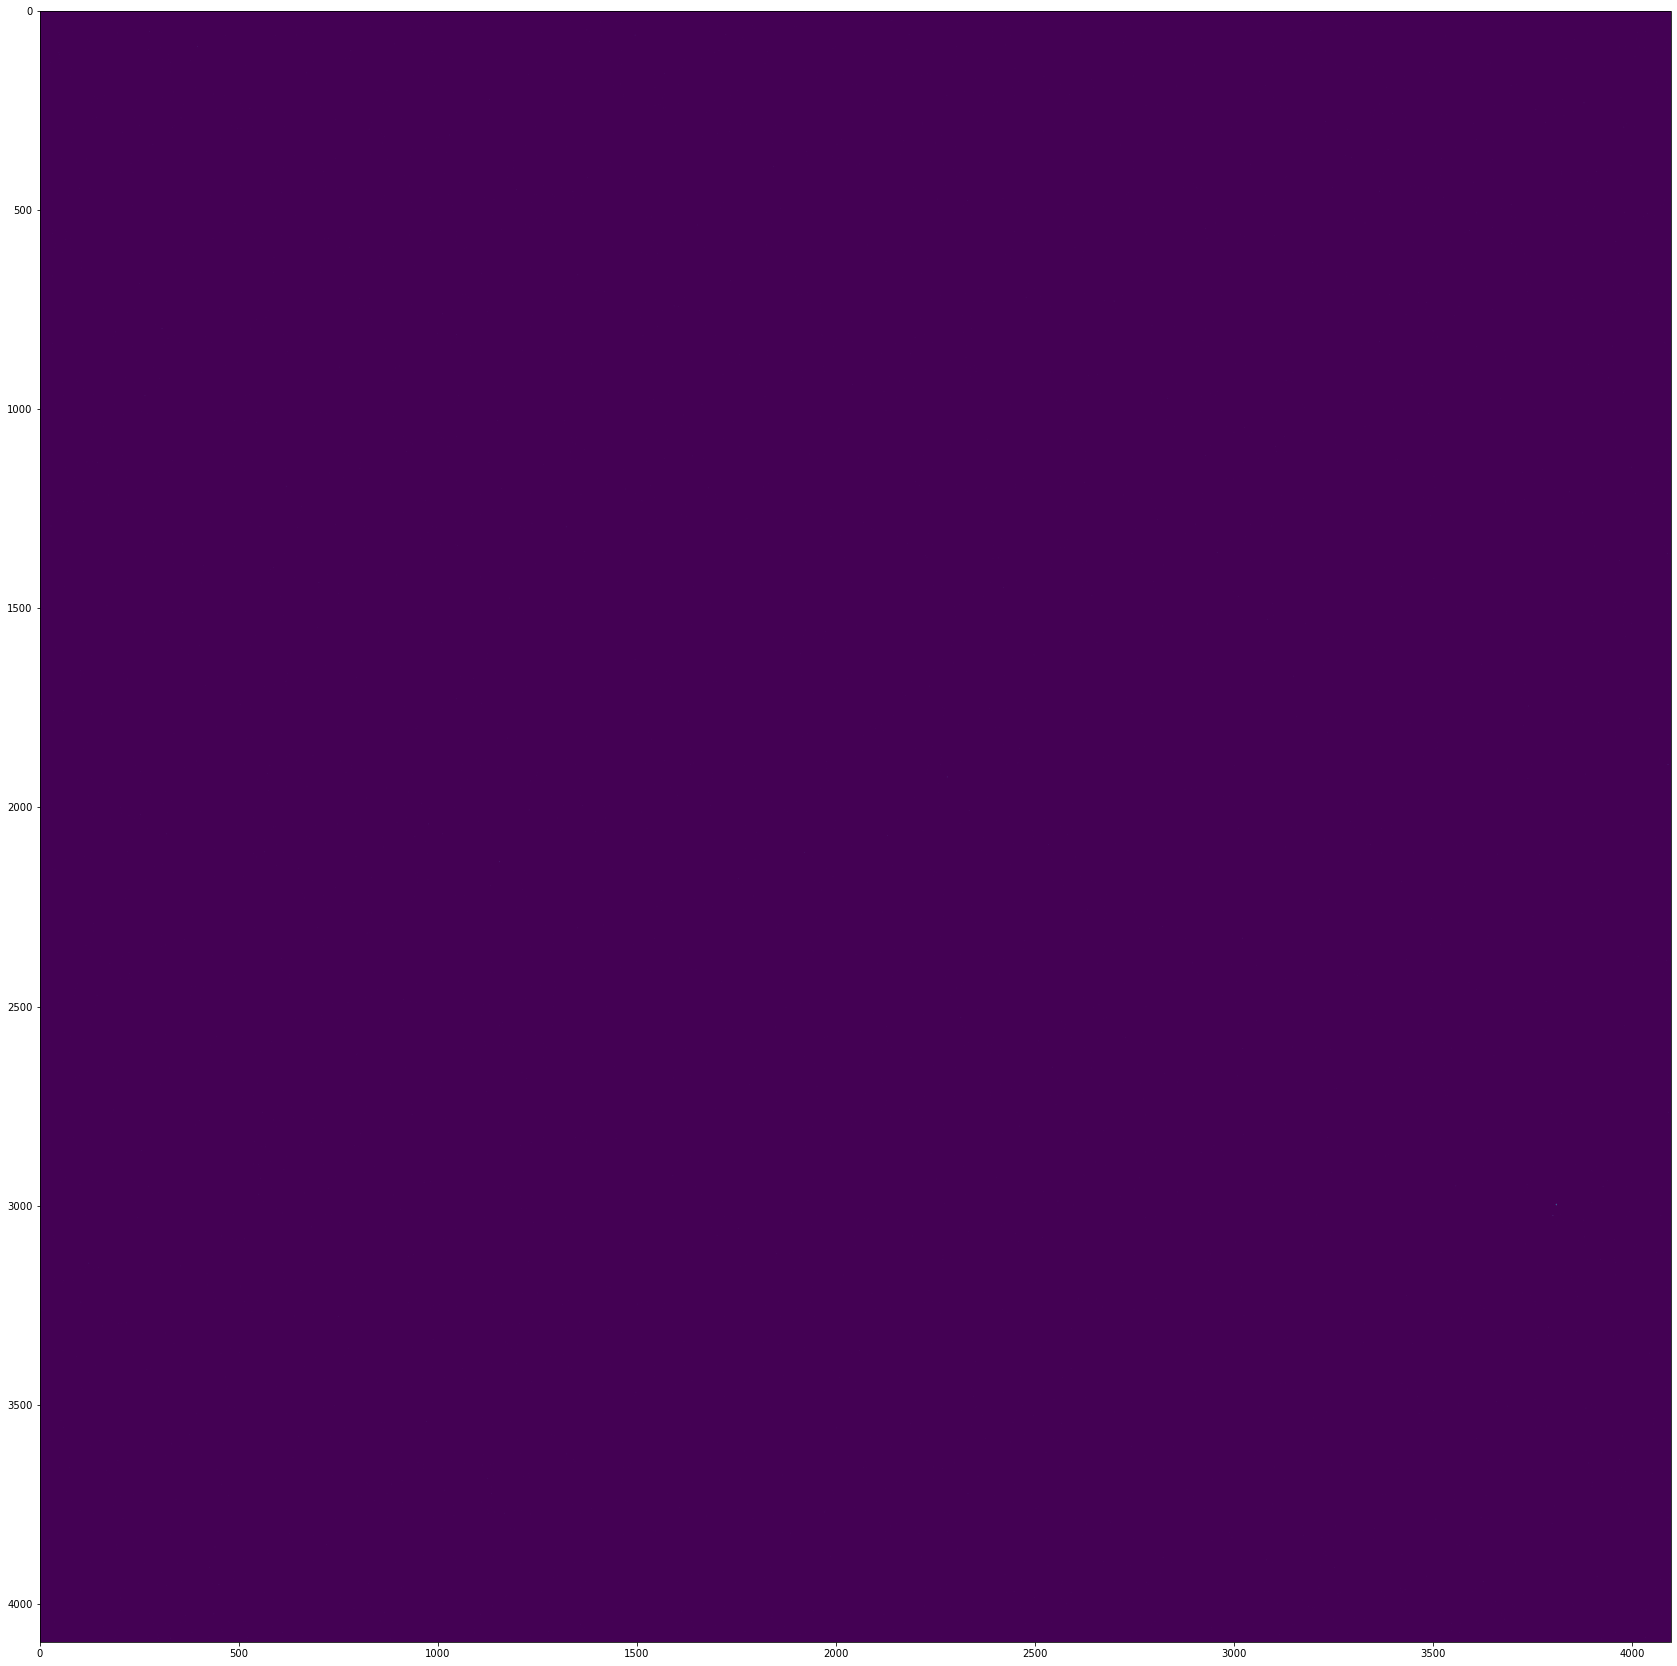

In [10]:
plt.figure(figsize=(30,30))
plt.imshow(d2)

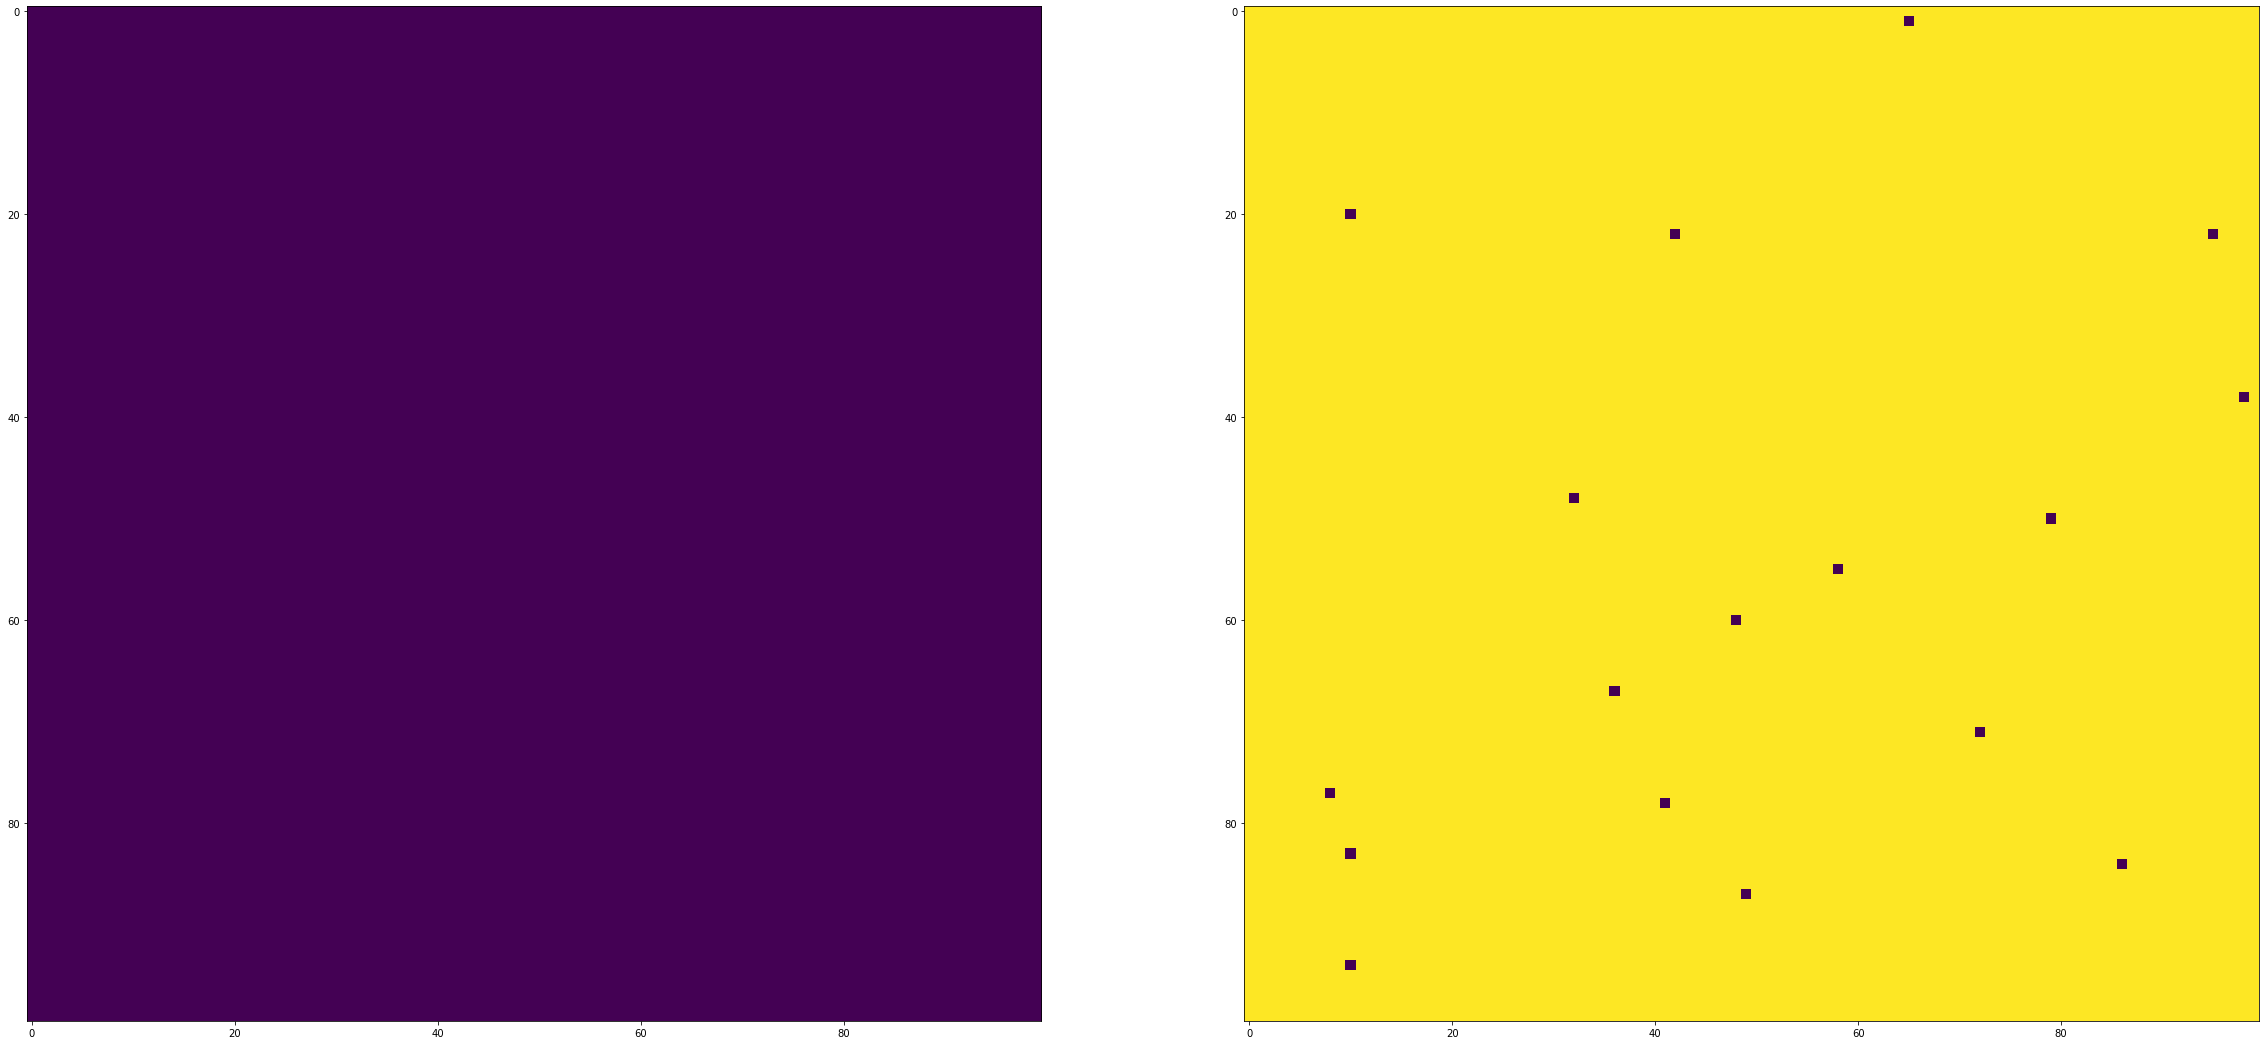

In [12]:
fig=plt.figure(figsize=(40,30))
fig.add_subplot(1,2,1).imshow(d1[200:300,200:300])
fig.add_subplot(1,2,2).imshow(d2[200:300,200:300])

In [13]:
Counter(d1.ravel())

Counter({1.0: 16777023, 0.0: 193})

In [14]:
Counter(d2.ravel())

Counter({1.0: 16744489, 0.0: 32727})

In [ ]:
#Creacion de fits
hdu=fits.ImageHDU()
hdu.data=#datos de imagen a agregar
hdu.header=#datos de header
hdu.writeto('BPM.fit')